# Example: transfer learning on resnet

In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = '/home/dg/data/dog_breeds/Images'
fns = get_image_files(path)

In [3]:
d = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = d.dataloaders(path)

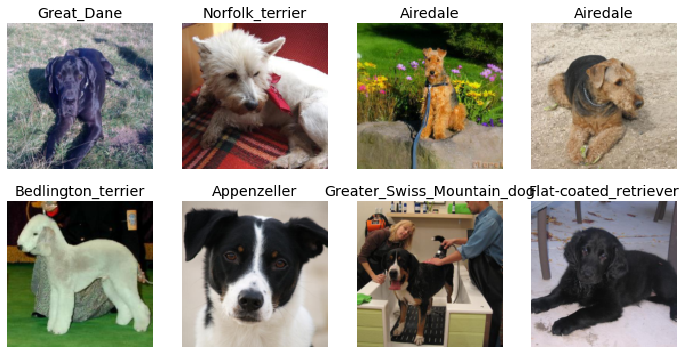

In [13]:
dls.valid.show_batch(max_n=8, nrows=2)

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/dg/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.973205,1.874345,0.498299,00:21


epoch,train_loss,valid_loss,error_rate,time
0,1.933141,1.455769,0.408163,00:27
1,1.554381,1.345518,0.381924,00:27
2,1.033948,1.238081,0.349368,00:27
3,0.729112,1.215718,0.344509,00:27


In [15]:
learn.export()

In [4]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [5]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [6]:
img = PILImage.create(btn_upload.data[-1])

In [7]:
pred,pred_idx,probs = learn_inf.predict(img)

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [8]:
print(f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}')

Prediction: Blenheim_spaniel; Probability: 0.9903
